# EXPLORATORY ANALYSIS OF THE TITANIC DATASET.

In [6]:
# Import the exploratory and visualizations library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
import datetime

sns.set_theme()

# Import libraries for Machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

RMS titanic was a British cruise passenger liner ship operated by the white star line which sank in the north Atlantic Ocean after striking an iceberg during this maiden voyage. Of the estimated 2,224 passengers and crew aboard, more than 1500 died. This disaster drew much public attention, provided many foundational materials, questions, intrigues and possibly a dataset that has inspired many Data scientists and machine learning engineers alike to explore, analyse and understand the effect/correlations between factors (parameters) such as age, class, gender, passenger fares etc to their survival on the ship in a bid to determine how these factors could play a pivotal role in their survival/death rate recorded in this mayhem.

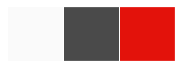

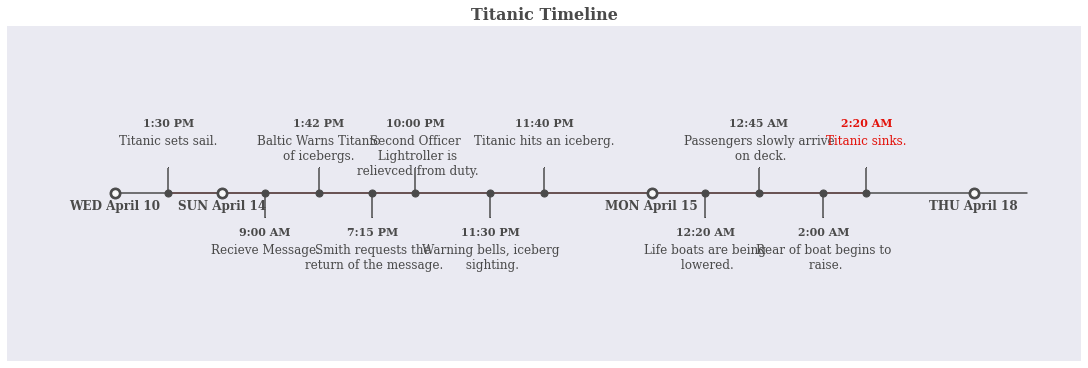

In [7]:
# Timeline of events on the titanic

sns.palplot(['#fafafa', '#4a4a4a', '#e3120b'])



tl_dates = [
    "WED April 10",
    "SUN April 14",
    "MON April 15",
    "THU April 18"
]

tl_x = [1, 2, 6, 9]

tl_sub_x = [1.5, 2.4, 2.9, 3.4, 3.8, 4.5, 5.0, 6.5, 7, 7.6, 8]
tl_sub_times = [
    "1:30 PM",
    "9:00 AM",
    "1:42 PM",
    "7:15 PM",
    "10:00 PM",
    "11:30 PM",
    "11:40 PM",
    "12:20 AM",
    "12:45 AM",
    "2:00 AM",
    "2:20 AM",
]

tl_text = [
    "Titanic sets sail.",
    "Recieve Message.",
    "Baltic Warns Titanic\nof icebergs.", 
    "Smith requests the\n return of the message.",
    "Second Officer\n Lightroller is\n relievced from duty.",
    "Warning bells, iceberg\n sighting.",
    "Titanic hits an iceberg.",
    "Life boats are being\n lowered.",
    "Passengers slowly arrive\n on deck.",
    "Rear of boat begins to\n raise.",
    "Titanic sinks."
]

# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 5), constrained_layout=True)
ax.set_ylim(-2, 2)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.95, c='#4a4a4a', zorder=1)
# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.2, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a')
    

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b')

# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Titanic Timeline", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')

plt.show()

Visualisation of Timeline of the Titanic ship from port of departure till it sank in the North Atlantic Ocean on the 18th of April 1912.

In [8]:
# importing data for analysis

titanic_data = pd.read_csv("titanic.csv")

In [9]:
# The current view is unstructured, it shows the data but it does not present it in a structured format

print(titanic_data)



     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [10]:
# Using the .head() function helps arrange the data in a more structured or tabular form for easy reading
## examine the first 10 data of the imported dataset


titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
# examine the last 10 data of the imported dataset

titanic_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


# DATA DICTIONARY

In [12]:
# To get more information on the dataset and the type of data in it 

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Quick Summary of the Dataset showing it's characteristics including index type, columns, non-null values and memory usage.

In [13]:
#Description of dataset providing statistics

titanic_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Statistical overview of columns showing the total object counts, mean value acroos different columns, Standard deviation, spread of distribution measured in Quartiles and some other useful statistical summaries.  

<AxesSubplot:>

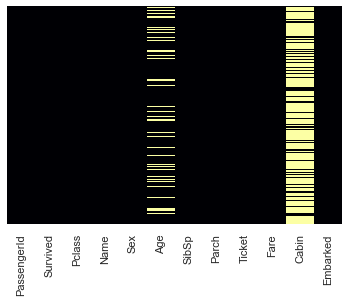

In [14]:
# From the .describe() function and the .info() function we can see that our dataset contains some missing values
## We can create a heat map using a seaborn too to have a visual idea of the missing data and its spread in the data set

sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap="inferno")

Heat map of missing data shown in Age and cabin.

In [15]:
# this gets the number of missing data in our data

print(titanic_data.isna().sum())

print('------------')

print("Missing data in Age =",titanic_data["Age"].isna().sum())
print("Missing data in Cabin =",titanic_data["Cabin"].isna().sum())
print("Missing data in Embarked =",titanic_data["Embarked"].isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------
Missing data in Age = 177
Missing data in Cabin = 687
Missing data in Embarked = 2


In [16]:
# make a deep copy of the data set for training and analysis

titanic_data_age = titanic_data.copy()

titanic_data_age.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Exploratory analysis on Age

In [17]:
#fill the age parameter missing values with the average age value
average_age = round(titanic_data_age['Age'].mean(), 2)

titanic_data_age['Age'].fillna(average_age, inplace=True)

#re-perform a descriptive stat on the dataset
titanic_data_age.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.700000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There now seems to be a closer range between the average age and the median age of the passengers which can evaluate to a better data preparation for machine learning algorithms. But, how correlated are these parameters with each other especially the age of passengers, class etc with their survival rate needs to be diagnosed further.


In [18]:
#check correlation between the attributes 
corr_pattern = titanic_data_age.corr()
corr_pattern


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033206,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069811,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331334,0.083081,0.018443,-0.549500
Age,0.033206,-0.069811,-0.331334,1.000000,-0.232624,-0.179194,0.091563
SibSp,-0.057527,-0.035322,0.083081,-0.232624,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179194,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091563,0.159651,0.216225,1.000000


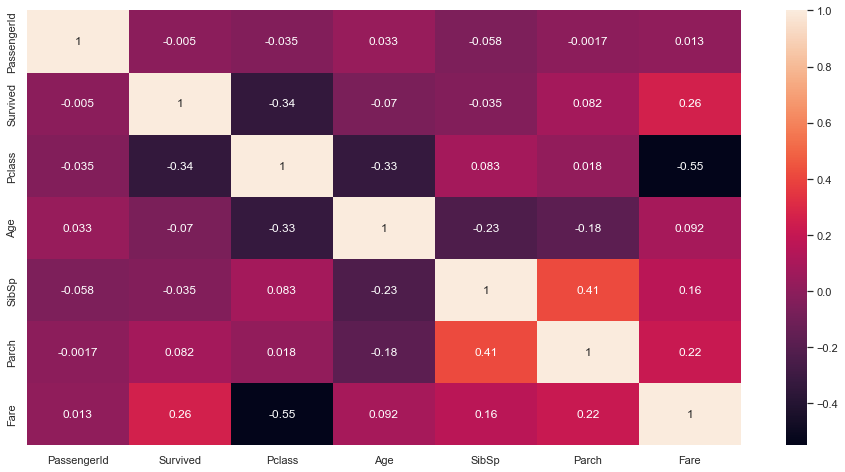

In [19]:
#heat map of the correlation between attributes
plt.figure(figsize = (16, 8))
sns.heatmap(corr_pattern, annot=True);

It can be inferred that there seems to be a strong correlation between the fare passengers paid and how they survived which accounts for about 6% variation in the number survived. However, the age parameter seems to be negatively and weakly correlated to survival which infers that as the age increases, it results to less number of survival. lets visualize this hypothesis.

It would be clearer and more incisive to categorise the age parameter. For the purpose of this report;


Young age = 34 years or younger
Middle age = 35 - 59 years
Elderly =  60 years and above

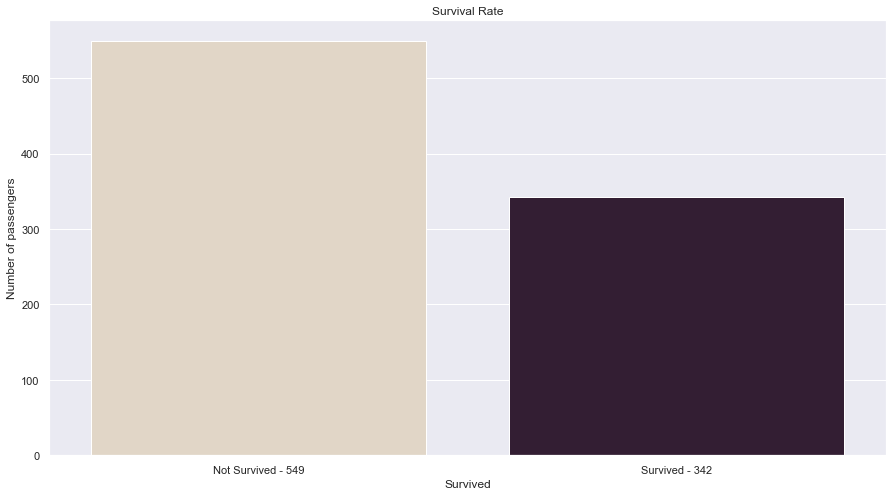

In [20]:
#prepare the data for visualization

total_pass_survived = titanic_data_age['Survived'].value_counts()[1]
total_pass_not_survived = titanic_data_age['Survived'].value_counts()[0]

plt.figure(figsize=(15,8))

sns.countplot(data=titanic_data_age, x='Survived', palette='ch:.25')

plt.title('Survival Rate')
plt.ylabel('Number of passengers')
plt.xticks((1,0),[f'Survived - {total_pass_survived}', f'Not Survived - {total_pass_not_survived}'])
plt.show()


Barplot showing total count of survivors and non survivors.

In [21]:
#compare age brackets with survival

young_age_survived = titanic_data_age.loc[(titanic_data_age['Age'] < 35), 'Survived' ].value_counts()[1]
middle_age_survived = titanic_data_age.loc[(titanic_data_age['Age'].apply(lambda val: 35 <= val < 60 )), 'Survived'].value_counts()[1]
elderly_age_survived = titanic_data_age.loc[(titanic_data_age['Age'] >= 60), 'Survived'].value_counts()[1]

young_age_not_survived = titanic_data_age.loc[(titanic_data_age['Age'] < 35), 'Survived' ].value_counts()[0]
middle_age_not_survived = titanic_data_age.loc[(titanic_data_age['Age'].apply(lambda val: 35 <= val < 60 )), 'Survived'].value_counts()[0]
elderly_age_not_survived = titanic_data_age.loc[(titanic_data_age['Age'] >= 60), 'Survived'].value_counts()[0]

per_young_age_survived = round(young_age_survived * 100 / (young_age_survived + young_age_not_survived), 2)
per_middle_age_survived = round(middle_age_survived * 100 / (middle_age_survived + middle_age_not_survived), 2)
per_elderly_age_survived = round(elderly_age_survived * 100 / (elderly_age_survived + elderly_age_not_survived), 2)


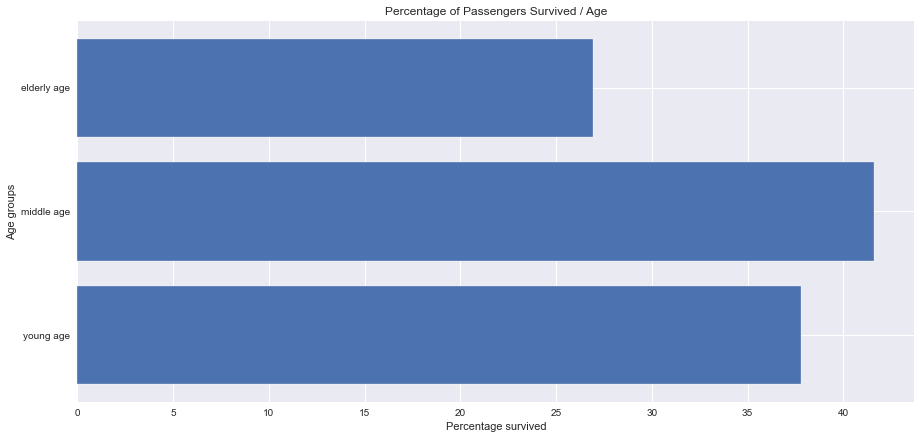

In [22]:
#visualizing the data
plt.style.use('seaborn')

age_survived = {
    'young age': per_young_age_survived,
    'middle age': per_middle_age_survived,
    'elderly age': per_elderly_age_survived
}

fig, ax = plt.subplots(figsize=(15,7))

ax.barh( list(age_survived.keys()), list(age_survived.values()));
ax.set(title='Percentage of Passengers Survived / Age',
      xlabel='Percentage survived',
      ylabel='Age groups');


Visual representation of the data showed that more of the middle and young aged survived than the elderly.
However, how many of these survivors are male or female would still be investigated.

# Exploratory analysis of Passenger Class

In [23]:
# grouping the passenger class by survival
## Where 0 = dead and 1 = survied, we can see that the first class had the lowest number of deaths while the 3rd class had the highest number of deaths.


titanic_data.groupby(["Pclass", "Survived"]).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   64     80     80      80    80   
       1                 136   136  136  122    136    136     136   136   
2      0                  97    97   97   90     97     97      97    97   
       1                  87    87   87   83     87     87      87    87   
3      0                 372   372  372  270    372    372     372   372   
       1                 119   119  119   85    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1      0            59        80  
       1           117       134  
2      0             3        97  
       1            13        87  
3      0             6       372  
       1             6       119

In [24]:
# Total count of death aboard the Titanic from the dataset
total_death = []

def death_count(coun):
    for survivors in titanic_data["Survived"]:
        if survivors == coun:
            total_death.append(coun)
    return len(total_death)

print("Total death =", death_count(0))


Total death = 549


In [25]:
# Actual count of the people that survived on the ship fron the "Survived" column
total_death = []

def death_count(coun):
    for survivors in titanic_data["Survived"]:
        if survivors == coun:
            total_death.append(coun)
    return len(total_death)

print("Total survived =", death_count(1))


Total survived = 342


In [26]:
# Actual count of the people in the 1st class compartment represented by "1" on the "Pclass" column
total_class = []

def passenger_class(clas):
    for passengerclass in titanic_data["Pclass"]:
        if passengerclass == clas:
            total_class.append(clas)
    return len(total_class)

print("First class total =", passenger_class(1))

First class total = 216


In [27]:
# Actual count of the people in the 2nd class compartment represented by "2" on the "Pclass" column
total_class = []

def passenger_class(clas):
    for passengerclass in titanic_data["Pclass"]:
        if passengerclass == clas:
            total_class.append(clas)
    return len(total_class)

print("2nd class total =", passenger_class(2))

2nd class total = 184


In [28]:
# Actual count of the people in the 3rd class compartment represented by "3" on the "Pclass" column
total_class = []

def passenger_class(clas):
    for passengerclass in titanic_data["Pclass"]:
        if passengerclass == clas:
            total_class.append(clas)
    return len(total_class)

print("3rd class total =", passenger_class(3))

3rd class total = 491


<AxesSubplot:title={'center':'Passenger Class'}, ylabel='Pclass'>

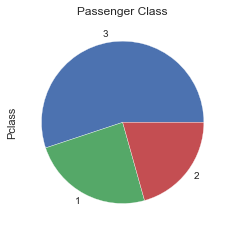

In [29]:
# A plot to show the class distribution from the passangers on the ship from the "Pclass" column
plt.subplot2grid((1,2), (0,0))
titanic_data["Pclass"].value_counts().plot(kind="pie", title= "Passenger Class",)

Piechart showing distribution of Passenger classes. 3rd Class has the highest number of passengers with 491 , 2nd class with 184 and 1st class with 216 passengers.

In [30]:
# We move to counts of the the individual column to count the numbers of `survived` and `Dead` in different perssenger class(Pclass)
total_perclass = []
total_Passengerclass = titanic_data["Pclass"]
total_Survivors = titanic_data["Survived"]

def class_survivor(clas):
    for passengerclass, survived in zip(total_Passengerclass, total_Survivors):
        if passengerclass == clas and survived:
            total_perclass.append(clas)
    return len(total_perclass)

print("Total survived in 1st class =", class_survivor(1))

Total survived in 1st class = 136


In [31]:
# To count total dead in 1st class

total_perclass = []
total_Passengerclass = titanic_data["Pclass"]
total_Survivors = titanic_data["Survived"]

def class_survivor(clas):
    for passengerclass, survived in zip(total_Passengerclass, total_Survivors):
        if passengerclass == clas and survived== False:
            total_perclass.append(clas)
    return len(total_perclass)

print("Total Dead in 1st class =", class_survivor(1))

Total Dead in 1st class = 80


In [32]:
total_perclass = []
total_Passengerclass = titanic_data["Pclass"]
total_Survivors = titanic_data["Survived"]

def class_survivor(clas):
    for passengerclass, survived in zip(total_Passengerclass, total_Survivors):
        if passengerclass == clas and survived:
            total_perclass.append(clas)
    return len(total_perclass)

print("Total survived in 2nd class =", class_survivor(2))

Total survived in 2nd class = 87


In [33]:
total_perclass = []
total_Passengerclass = titanic_data["Pclass"]
total_Survivors = titanic_data["Survived"]

def class_survivor(clas):
    for passengerclass, survived in zip(total_Passengerclass, total_Survivors):
        if passengerclass == clas and survived== False:
            total_perclass.append(clas)
    return len(total_perclass)

print("Total Dead in 2nd class =", class_survivor(2))

Total Dead in 2nd class = 97


In [34]:
total_perclass = []
total_Passengerclass = titanic_data["Pclass"]
total_Survivors = titanic_data["Survived"]

def class_survivor(clas):
    for passengerclass, survived in zip(total_Passengerclass, total_Survivors):
        if passengerclass == clas and survived:
            total_perclass.append(clas)
    return len(total_perclass)

print("Total survived in 3rd class =", class_survivor(3))

Total survived in 3rd class = 119


In [35]:
total_perclass = []
total_Passengerclass = titanic_data["Pclass"]
total_Survivors = titanic_data["Survived"]

def class_survivor(clas):
    for passengerclass, survived in zip(total_Passengerclass, total_Survivors):
        if passengerclass == clas and survived== False:
            total_perclass.append(clas)
    return len(total_perclass)

print("Total Dead in 3rd class =", class_survivor(3))

Total Dead in 3rd class = 372


In [36]:
# To see the number of suvivors and death by passenger class in a tabular form we use the .crosstab function
pclass_xter = pd.crosstab(titanic_data["Pclass"], titanic_data["Survived"])
print(pclass_xter)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


Text(0, 0.5, 'Survival rate')

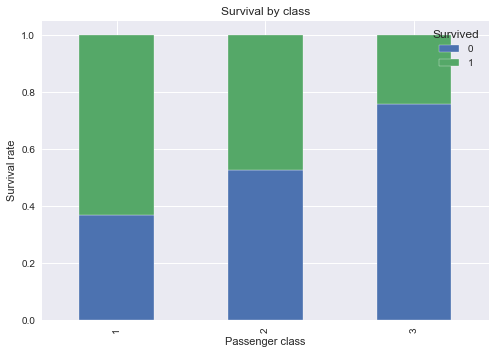

In [37]:
# We plot a graph to show visual representation of the above data
pclass_xtersum = pclass_xter.div(pclass_xter.sum(1).astype(float), axis=0)

pclass_xtersum.plot(kind= "bar", stacked=True, title= "Survival by class")
plt.xlabel("Passenger class")
plt.ylabel("Survival rate")

From the graph above we can infer that passengers in the 1st class had better chances of survival, in 2nd class 87 passengers survived while 97 died. The 3rd class had worst survival rate on the ship with 76% of them losing their lives.

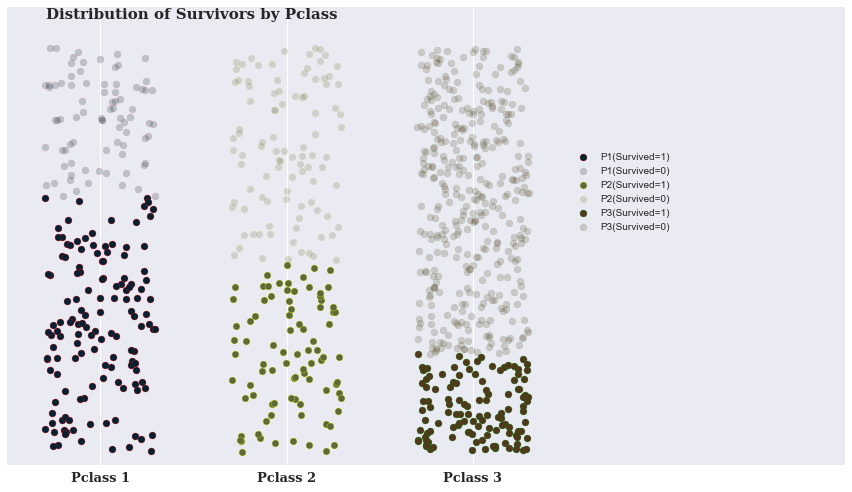

In [38]:
# Survival probability visualization for each Pclass
survival_rate = titanic_data.groupby(['Pclass']).mean()[['Survived']]
p1_rate = survival_rate.loc[1]
p2_rate = survival_rate.loc[2]
p3_rate = survival_rate.loc[3]

p1_pos = np.random.uniform(0, p1_rate, len(titanic_data[(titanic_data['Pclass']==1) & (titanic_data['Survived']==1)]))
p1_neg = np.random.uniform(p1_rate, 1, len(titanic_data[(titanic_data['Pclass']==1) & (titanic_data['Survived']==0)]))
p2_pos = np.random.uniform(0, p2_rate, len(titanic_data[(titanic_data['Pclass']==2) & (titanic_data['Survived']==1)]))
p2_neg = np.random.uniform(p2_rate, 1, len(titanic_data[(titanic_data['Pclass']==2) & (titanic_data['Survived']==0)]))
p3_pos = np.random.uniform(0, p3_rate, len(titanic_data[(titanic_data['Pclass']==3) & (titanic_data['Survived']==1)]))
p3_neg = np.random.uniform(p3_rate, 1, len(titanic_data[(titanic_data['Pclass']==3) & (titanic_data['Survived']==0)]))




fig, ax = plt.subplots(1, 1, figsize=(12, 7))

np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), p1_pos, color='#022133', edgecolor='red', label='P1(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), p1_neg, color='#022133', edgecolor='red', alpha=0.2, label='P1(Survived=0)')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), p2_pos, color='#5c693b', edgecolor='yellow', label='P2(Survived=1)')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), p2_neg, color='#5c693b', edgecolor='yellow', alpha=0.2, label='P2(Survived=0)')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), p3_pos, color='#51371c', edgecolor='green', label='P3(Survived=1)')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), p3_neg, color='#51371c', edgecolor='green', alpha=0.2, label='P3(Survived=0)')



# # Set Figure & Axes
ax.set_xlim(-0.5, 4.0)
ax.set_ylim(-0.03, 1.1)

# # Ticks
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Pclass 1', 'Pclass 2', 'Pclass 3'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.06, 0.95, 'Distribution of Survivors by Pclass', fontweight='bold', fontfamily='serif', fontsize=15, ha='left')    


ax.legend(loc=(0.67, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()

Graph Showing the distribution of the Survived and non survived passengers in each Class

# Exploratory analysis on Embarked

In [39]:
# A brief discription of the Embarked column
titanic_data["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Total Passengers from Southampton = 644
Total Passengers from Cherbourg = 168
Total Passengers from Queenstown = 77


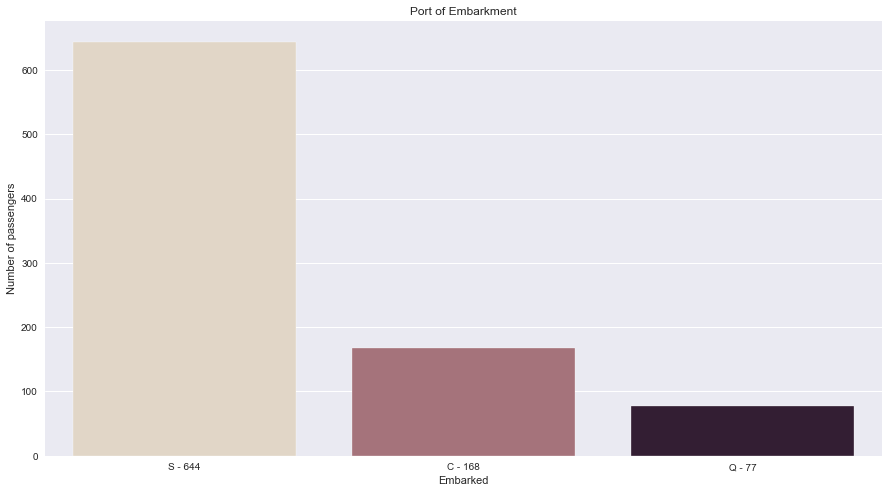

In [40]:
# This chart shows that majority of the passengers boarded the ship from Southamptom, while the queenstown was the least popular port of embarkment

total_south_Embarked  = titanic_data['Embarked'].value_counts()["S"]
print("Total Passengers from Southampton =", total_south_Embarked)
total_char_Embarked  = titanic_data['Embarked'].value_counts()["C"]
print("Total Passengers from Cherbourg =", total_char_Embarked)
total_que_Embarked  = titanic_data['Embarked'].value_counts()["Q"]
print("Total Passengers from Queenstown =", total_que_Embarked)

plt.figure(figsize=(15,8))

sns.countplot(data=titanic_data, x='Embarked', palette='ch:.25')

plt.title('Port of Embarkment')
plt.ylabel('Number of passengers')
plt.xticks((0,1,2),[f'S - {total_south_Embarked}', f'C - {total_char_Embarked}', f'Q - {total_que_Embarked}' ])
plt.show()

Graphical represtation of passenger's port of Embarkment. Southampton had highest passenger contribution of with 73% while Queenstown accounted for the least contribution with 9%.


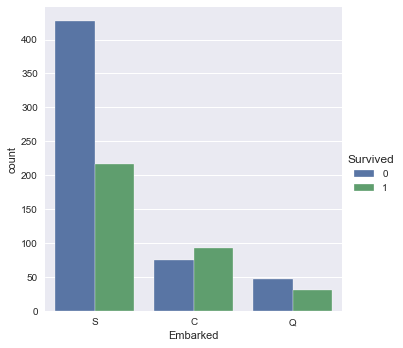

In [41]:
# Distribution of the Port of Embarkment against Survival
## The graph above shows the distribution of Survival and Death by Port of embarkment and we can see that most people that embarked from Charbourg survived as compared to other port of embarkment
### This could be directly tied to the Pclass per port of embarkment

sns.catplot(x = "Embarked", hue = "Survived", kind= "count", data = titanic_data)

Text(0, 0.5, 'Passanger Class')

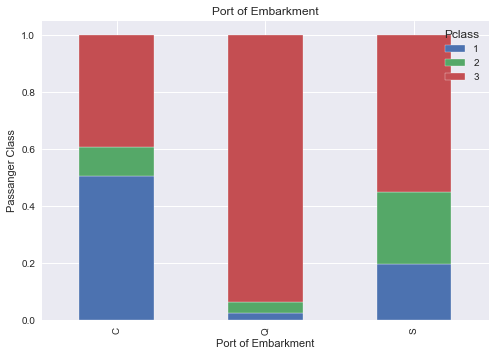

In [42]:
# Visualization of Port of Embarkment and the Passenger class distribution

pemba_xter = pd.crosstab(titanic_data["Embarked"], titanic_data["Pclass"])
pemba_xtersum = pemba_xter.div(pemba_xter.sum(1).astype(float), axis=0)

pemba_xtersum.plot(kind= "bar", stacked=True, title= "Port of Embarkment")
plt.xlabel("Port of Embarkment")
plt.ylabel("Passanger Class")

A graph showing the Passenger class distribution by Port of embarkment, majority of passengers that embarked from the port of Queenstown were in the 3rd class while the majority of passengers from Charborg were in the first class. This is a good indication of the socio-economic status of the passengers aboard the Titanic

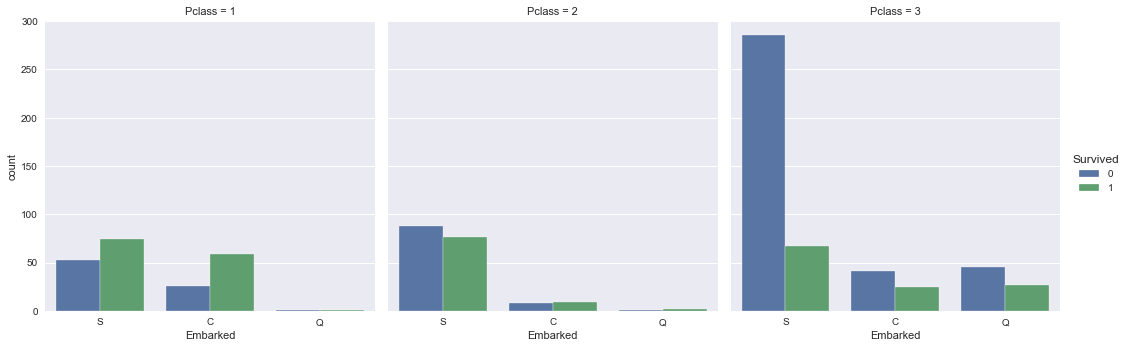

In [43]:
#Finally we will combine the Pclass with the port of embarkment and see how passengers survived per class
sns.catplot(x = "Embarked", hue = "Survived", kind = "count", col = "Pclass", data = titanic_data)

A matrix of the port of embarkment, with focus on the survival rate per class and port of embarkment, 1st class had more survivors as compared to 2nd or 3rd class. 3rd class had more death as compared to the remaining classes with a majority of the passengers from Southhampton losing their lives.

# Exploratory analysis on Gender

In [44]:
# Total number of male and female passengers

print("Male Passengers:" , titanic_data_age['Sex'].value_counts()['male'])

print("Female Passengers:" , titanic_data_age['Sex'].value_counts()['female'])


Male Passengers: 577
Female Passengers: 314


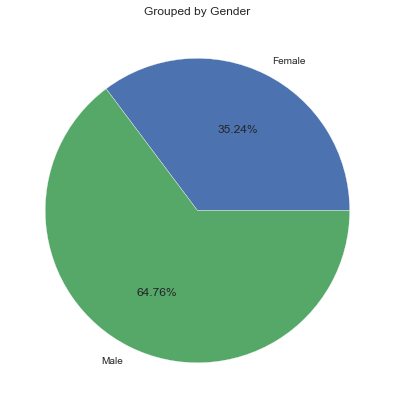

In [45]:
# Pie chart of Gender 


gender_count = titanic_data.groupby('Sex')['Sex'].count()

plt.figure(figsize=(7,7))
plt.title('Grouped by Gender')
plt.pie(gender_count.values, labels=['Female', 'Male'], autopct='%1.2f%%' )
plt.show()

Piechart of the gender distribution on the Titanic, with the male population accounting for 64.7% while the female was 35.2% of the total population.

In [46]:
# Gender Analysis


total_gender = titanic_data["Sex"]
total_survived = titanic_data["Survived"]

def gender_count(gen):
    
    count =0
    for gender, survived  in zip(total_gender, total_survived):
        if gender == gen  and survived:
            
            count = count + 1
    return count 


print ("Survived Male:" , gender_count("male"))
print ("Percentage of Survived Male:" , round(gender_count("male")/(titanic_data["Sex"].value_counts().male)*100 , 2),"%")

print ("Survived Female:" , gender_count("female"))
print ("Percentage of Survived Female:" , round(gender_count("female")/(titanic_data["Sex"].value_counts().female)*100 , 2),"%")


Survived Male: 109
Percentage of Survived Male: 18.89 %
Survived Female: 233
Percentage of Survived Female: 74.2 %


,Sex,Survived
0,female,0.742038
1,male,0.188908


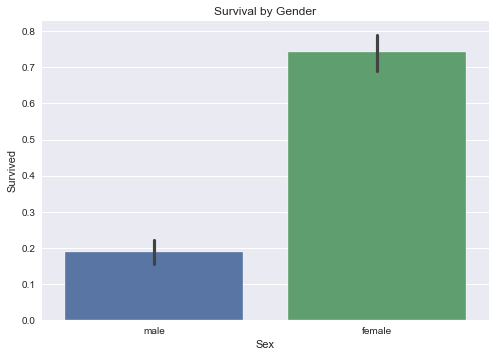

In [47]:
# Barplot of Survival by gender
sns.barplot(x = "Sex", y= 'Survived', data = titanic_data)
plt.title("Survival by Gender")

# Table for percentage of male and female survived
titanic_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)    

We can see that survived females are higher than males although the total count of females are lower in numbers. The females survived better, with the percentage of their survivability being at 74.2%

In [48]:
# Survival of Gender of passengers in Each Class


pd.pivot_table(titanic_data,  values = "Survived", columns = "Sex", index = "Pclass")

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


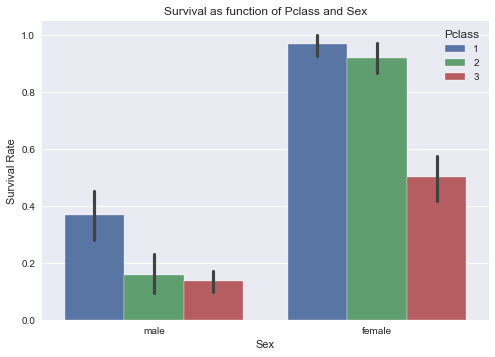

In [49]:
# Barplot - Survival vs class and gender 

sns.barplot(x='Sex', y='Survived', hue='Pclass', data=titanic_data)
plt.ylabel("Survival Rate")


plt.title("Survival as function of Pclass and Sex")
plt.show()

A visual exploration of the Survival rate per gender given their class distribution, 1st and 2nd class passengers had better survival rate amongst the Female. The whole Female gender had a better survival rate than the Male irrespective of the passenger class.

# Exploratory analysis on Fare

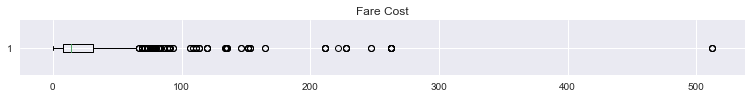

In [50]:
# Distribution of Fare Costs

plt.figure(figsize=(13,1))
plt.title('Fare Cost')
plt.boxplot(titanic_data['Fare'], vert=False)
plt.show()

A boxplot of the fare cost, this shows the presence of an outlier in our data set.

In [51]:
# Distribution of Fare prices and its count

titanic_data['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [52]:
# Mean of fare by each Gender

titanic_data.groupby(["Sex"])["Fare"].mean()


Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [53]:
# Mean of fare by each Class

titanic_data.groupby(["Pclass"])["Fare"].mean()


Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

This shows that passengers in the 1st class paid the highest fares while, passengers in the 3rd class paid lower fares. This confirms the inference of Passenger class as a measure of socio-economic status.

In [54]:
# Mean of fare by Embarkment

titanic_data.groupby(["Embarked"])["Fare"].mean()


Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

The table above confirms that majority of the passengers that boarded from Charborg went into the 1st or 2nd class while majority of passengers in Queenstown were in 3rd class as indicated by the fare average.

In [55]:
# Mean of fare by Survived

titanic_data.groupby(["Survived"])["Fare"].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

The table above shows that people that paid higher fares had a better chance of survival.

# Data Transformation

After exploring the data, we can itemise differnt factors that can have either a positive or negative effect on predicting survival. To proceed to this step, we need to convert some features into uniform data types that can be feed into the computer for machine learning. Our steps will include constructive transformation (adding, copying and replicating data), destructive transformation(deleting fields and records), aesthetic(standadizing values or salutations) and structural transformation(renaming, moving and combining columns in a data set).

In [56]:
# Creating a copy of our data for transformation

titanic_data_transform = titanic_data.copy()

### Family Size

In [57]:
#creating the new parameter - family size , where we add siblings,spouse and parents,children count


titanic_data_transform['Family Size'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

titanic_data_transform.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


A table containing our new feature, engineered with the existing columns to create the "Family Size" column

### Gender

In [58]:
# Creating new column Gender for correlation purpose
# Substituting male as 1 and female as 0


titanic_data_transform["Gender"] = np.where(titanic_data["Sex"] != "female" , 1 , 0)

titanic_data_transform.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [59]:
# Corrleating Gender with survivalibity   
corr_matrix = titanic_data_transform.corr()

corr_matrix["Gender"].sort_values(ascending=False)

Gender         1.000000
Pclass         0.131900
Age            0.093254
PassengerId    0.042939
SibSp         -0.114631
Fare          -0.182333
Family Size   -0.200988
Parch         -0.245489
Survived      -0.543351
Name: Gender, dtype: float64

since male is 1 and female is 0 , higher the correlation number better the male survivability and the lower the correlation number better the female survivability.


### Fare

In [60]:
# Creating new column Fare group for data transformation 

titanic_data_transform['Fare_Group'] = titanic_data['Fare']

# Using qcut function - create 5 equally distributed bins

titanic_data_transform['Fare_Group'] =pd.qcut(titanic_data['Fare'], 5)

titanic_data_transform['Fare_Group'].value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare_Group, dtype: int64

In [61]:
# Finding corrleation with survived

titanic_data_transform[['Fare_Group', 'Survived']].groupby(['Fare_Group'], as_index=False).mean().sort_values(by='Fare_Group', ascending=True)

,Fare_Group,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [62]:
# Assigning values for each groups of Fare

titanic_data_transform.loc[ titanic_data_transform['Fare'] <= 7.854, 'Fare'] = 0
titanic_data_transform.loc[(titanic_data_transform['Fare'] > 7.854) & (titanic_data_transform['Fare'] <= 10.5), 'Fare'] = 1
titanic_data_transform.loc[(titanic_data_transform['Fare'] > 10.5) & (titanic_data_transform['Fare'] <= 21.679), 'Fare']   = 2
titanic_data_transform.loc[(titanic_data_transform['Fare'] > 21.679) & (titanic_data_transform['Fare'] <= 39.688), 'Fare'] = 3
titanic_data_transform.loc[ titanic_data_transform['Fare'] > 39.688 , 'Fare'] = 4


# Assumed fare per person
titanic_data_transform['Fare per person'] = titanic_data_transform['Fare'] / (titanic_data_transform['Family Size'] )

# Changing the float values to integer
titanic_data_transform['Fare'] = titanic_data_transform['Fare'].astype(int)
titanic_data_transform['Fare per person'] = titanic_data_transform['Fare per person'].astype(int)

# Deleting the fare group column
del titanic_data_transform['Fare_Group']

titanic_data_transform.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Gender,Fare per person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4,C85,C,2,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1,NaN,S,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,4,C123,S,2,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1,NaN,S,1,1,1


A table containing the 2nd feature, engineered with existing columns to create the "Fare per Person" column.

### Name (Title)

In [63]:
# Extracting the title from name

def get_title(var):

    title = var.split(',')[1]
    title2 = title.split('.')[0]
    return title2[1:]

# Create the title colmun

titanic_data_transform['Title'] = titanic_data_transform.apply(lambda x: get_title(x.Name), axis = 1)
print(titanic_data_transform.groupby('Title').count().sort_values(by='Survived', ascending=False)['Pclass'])

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Don               1
the Countess      1
Name: Pclass, dtype: int64


In [64]:
# Mapping of the title
## The mapping is defined with the following dictionnary 

title_map = {'Mlle':'Miss','Ms':'Miss','Mlle':'Miss', 
             'Mme':'Mrs', 
             'Dr':'Other','Rev':'Other', 'Major':'Other', 'Col':'Other', 'Sir':'Other', 'Dona':'Other',
             'Capt':'Other', 'Lady':'Other','Jonkheer':'Other', 'Don':'Other', 'the Countess':'Other',
            'Mr':'Mr',
            'Miss':'Miss',
            'Mrs':'Mrs',
            'Master':'Master'}

titanic_data_transform['Title'] = titanic_data_transform['Title'].map(title_map)



titanic_data_transform[['Title', 'Survived']].groupby('Title').mean().sort_values(by='Survived', ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Other,0.347826
Mr,0.156673


In [65]:
# Map titles to nominal values

titanic_data_transform["Title"] = titanic_data_transform["Title"].map({"Mr" : 0, "Mrs" : 1, "Miss" : 2, "Master" : 3, "Other" : 4})

# Changing the float value to integer
titanic_data_transform['Title'] = titanic_data_transform['Title'].astype(int)


titanic_data_transform.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Gender,Fare per person,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S,2,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4,C85,C,2,0,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1,NaN,S,1,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,4,C123,S,2,0,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1,NaN,S,1,1,1,0


### Embarked

In [66]:
# Fill missing values with maximum occurence of embarked category

print("Maximum Occurrence :", titanic_data_transform['Embarked'].describe()['top'])
titanic_data_transform['Embarked'].fillna('S', inplace=True)



# Map Ports to numeric values
titanic_data_transform["Embarked"] = titanic_data_transform["Embarked"].map({"S" : 0, "C" : 1, "Q" : 2})


Maximum Occurrence : S


In [67]:
titanic_data_transform.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Gender,Fare per person,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,0,2,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4,C85,1,2,0,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1,NaN,0,1,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,4,C123,0,2,0,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1,NaN,0,1,1,1,0


### Age

In [68]:
# Filling missing values of Age with mean
titanic_data_transform.Age.fillna(titanic_data_transform.Age.mean(), inplace=True)

# Young age = 34 years or younger - assigned as 1
## Middle age = above 34 and below 59 - assigned as 2
### Elderly =  60 years and above - assigned as 3
titanic_data_transform.loc[ titanic_data_transform['Age'] <= 34, 'Age'] = 0
titanic_data_transform.loc[(titanic_data_transform['Age'] >= 34.1) & (titanic_data_transform['Age'] <= 59), 'Age'] = 1
titanic_data_transform.loc[ titanic_data_transform['Age'] >= 60 , 'Age'] = 2


# Changing the float value to integer
titanic_data_transform['Age'] = titanic_data_transform['Age'].astype(int)


titanic_data_transform.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Gender,Fare per person,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,0,1,0,A/5 21171,0,NaN,0,2,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,1,0,PC 17599,4,C85,1,2,0,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,0,STON/O2. 3101282,1,NaN,0,1,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,1,0,113803,4,C123,0,2,0,2,1
4,5,0,3,"Allen, Mr. William Henry",male,1,0,0,373450,1,NaN,0,1,1,1,0


# Missing Data

The data set contained some missing data, this are usually represented as Nan or null or None in the dataset. "Age" column had 177 data missing which accounted for 20% of its entire data, since the missing data isn't significant to skew our analysis we used the inputation method with mean values to replace the missing data. "Cabin" had 687 missing data which is a significant fraction of the total data, 77% of total entries. Based on the volumn of data missing we decided to drop the column so that it does not negatively impact our analysis. "Embarked" missing data was filled using the Median value, it had just 2 entries missing.

# Machine Learning

We have explored the data set and we have identified correlations and existing relationships between different variable. We will proceed to carry out some Predictive analysis on the data set by looking to predict the survival of passengers on the ship. 3 Machine Learning models will be trained 1. Regression model, 2. Classification model 3. Clustering model, our aim is to compare the results and see which model offers the best prediction in terms of accuracy.

It is important to note that we do not have a provided label for the testing set so we need to use the predictions on our training set then we will compare our algorithims against each other.

In [69]:
# Deep copy of the dataset for machine learning model.

titanic_data_ml = titanic_data_transform.copy()

In [70]:
# Dropping the columns that are not needed of machine learning

titanic_data_ml = titanic_data_ml.drop(["Cabin"], axis =1)
titanic_data_ml = titanic_data_ml.drop(["Sex"], axis =1)
titanic_data_ml = titanic_data_ml.drop(["Name"], axis =1)
titanic_data_ml = titanic_data_ml.drop(["Ticket"], axis =1)
titanic_data_ml = titanic_data_ml.drop(["PassengerId"], axis =1)


In [71]:
titanic_data_ml.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Family Size,Gender,Fare per person,Title
0,0,3,0,1,0,0,0,2,1,0,0
1,1,1,1,1,0,4,1,2,0,2,1
2,1,3,0,0,0,1,0,1,0,1,2
3,1,1,1,1,0,4,0,2,0,2,1
4,0,3,1,0,0,1,0,1,1,1,0


In [72]:
# Splitting our dataset into training and test datasets into training and test data (75:25) ratio respectively

def split_titanic_data(val, test_ratio):
    shuffled_indices = np.random.permutation(len(val))
    test_data_size = int(len(val) * test_ratio)
    test_indices = shuffled_indices[:test_data_size]
    train_indices = shuffled_indices[test_data_size:]
    
    return val.iloc[train_indices], val.iloc[test_indices]



train_data, test_data = split_titanic_data(titanic_data_ml, 0.25)

train_data.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Family Size,Gender,Fare per person,Title
count,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000
mean,0.390135,2.282511,0.306428,0.542601,0.397608,2.028401,0.345291,1.940209,0.668161,1.182362,0.810164
std,0.488145,0.847332,0.525092,1.182479,0.830046,1.409155,0.618136,1.714507,0.471226,1.174678,1.113937
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,3.000000,1.000000,2.000000,1.000000,2.000000,2.000000
max,1.000000,3.000000,2.000000,8.000000,6.000000,4.000000,2.000000,11.000000,1.000000,4.000000,4.000000


In [73]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Family Size,Gender,Fare per person,Title
27,0,1,0,3,2,4,0,6,1,0,0
580,1,2,0,1,1,3,0,3,0,1,2
324,0,3,0,8,2,4,0,11,1,0,0
407,1,2,0,1,1,2,0,3,1,0,3
69,0,3,0,2,0,1,0,3,1,0,0


In [74]:
test_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Family Size,Gender,Fare per person,Title
780,1,3,0,0,0,0,1,1,0,0,2
668,0,3,1,0,0,1,0,1,1,1,0
214,0,3,0,1,0,0,2,2,1,0,0
131,0,3,0,0,0,0,0,1,1,0,0
789,0,1,1,0,0,4,1,1,1,4,0


In [75]:
# Prepare the training and test data
x_train = train_data.drop("Survived", axis = 1)
y_train = train_data["Survived"]
x_test = test_data.drop("SibSp", axis =1)

In [76]:
# view the test data
x_test.head()

,Survived,Pclass,Age,Parch,Fare,Embarked,Family Size,Gender,Fare per person,Title
780,1,3,0,0,0,1,1,0,0,2
668,0,3,1,0,1,0,1,1,1,0
214,0,3,0,0,0,2,2,1,0,0
131,0,3,0,0,0,0,1,1,0,0
789,0,1,1,0,4,1,1,1,4,0


###  Machine learning models

Classification Model - Random Forest

In [77]:
# Random Forest
import warnings

warnings.filterwarnings('ignore')

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(x_train, y_train)

y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

print(f'{round(acc_random_forest,2,)}%',)

88.19%


 Regression Model - Logistical Regression

In [78]:
# Logistical Regression


logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)

print(f'{round(acc_log,2,)}%',)

79.67%


Clustering Method - KNearest Neighbour(KNN)

In [79]:
# KNearest Neighbour

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train, y_train)  

y_pred = knn.predict(x_test)  

acc_knn = round(knn.score(x_train, y_train) * 100, 2)

print(f'{round(acc_knn,2,)}%',)

84.9%


# Model Evaluation

Which is the best model?

In [80]:
# Evaluate the best model
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Random Forest'],
    'Score': [ acc_knn, acc_log, acc_random_forest]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
88.19,Random Forest
84.90,KNN
79.67,Logistic Regression


Random forest tops the list as the best model for predicting survival on our data set, this is followed by KNN and then Logistical Regression.

# Feature Importance

Considering that random forest is our best model, we will explore further to see which feature was of greatest importance to predicting the Survival. Random forest is an aggregation of multiple decision tress, sklearn measures the features importance by looking at the different decision tree nodes that uses the exact features, it also reduces impurity of all trees in the forest.

In [81]:
importances = pd.DataFrame({'feature': x_train.columns, 'importance':np.round(random_forest.feature_importances_,3)})
importances =  importances.sort_values('importance', ascending=False).set_index('feature')

importances.head(10)

,importance
feature,
Title,0.234
Gender,0.215
Pclass,0.106
Fare,0.099
Family Size,0.096
Age,0.061
Embarked,0.057
Fare per person,0.051
SibSp,0.048


In terms of importance to predicting the survival we can see that "Parch" and "SibSp" contributed the least to successfully predicting survival while "Title" had the highest importance on predicting survival. Our engineered feature also contributed to the final prediction accuracy with "Family Size" as part of the top 5 features. 

# K-Fold Cross Validation:

We will run a K-fold Cross Validation on our random forest model. This essentially splits our training data into assigned folds, the random forest will then be trained and evaluated per the specified interval. Using a diiferent fold for evaluation everytime the average of the values is computed in the loop.


In [82]:
# K-fold cross validation using 10 folds (K=10)
scores = cross_val_score(random_forest, x_train, y_train, cv=10, scoring = "accuracy")

print('Scores:', scores)
print("----------------")
print('Mean:', scores.mean())
print("----------------------")
print('Standard Deviation:', scores.std())

Scores: [0.8358209  0.82089552 0.82089552 0.73134328 0.82089552 0.82089552
 0.79104478 0.76119403 0.74626866 0.8030303 ]
----------------
Mean: 0.7952284034373587
----------------------
Standard Deviation: 0.03463817358452769


This is a more realistic outlook, the model has an average accuracy of 80% with a standard deviation of 3%. The standard deviation is a strong measure of precision. 

With standard deviation of 3%, the accuracy of our model can differ by ±3%

# Conclusion

This project was carried out via detailed exploration of the Titanic dataset, missing data was explored using industry acceptable standards to wranggle and clean the data. Important features were established, as vast libraries such as seaborn, pandas, matplotlib were used for manipulating and data visualization. 

Three (3) different Machine Learning models were trained using different methods of predictive analysis to predict survival, after prediction, it was cross validated on our strongest model to validate our prediction accuracy. While there is room for improvement with our prediction by probably doing more feature engineering, identifying and removing noisy data. We believe we have done justice with our first try at a data science projcet with little Machine learning expertise.